In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [21]:
virtus_ai = pd.read_csv('Virtus_AI_discmean_weekly.csv')
stk = pd.read_csv('STK_discmean_weekly.csv')
nasdaq = pd.read_csv('NASDAQ_QQQX_discmean_weekly.csv')
bst = pd.read_csv('BST_discmean_weekly.csv')
bstz = pd.read_csv('BSTZ_discmean_weekly.csv')

Total Common Assets Weight Approach

In [22]:
virtus_ai_TCA = 786_954_000
stk_TCA = 577_985_000
nasdaq_TCA = 1_426_230_000
bst_TCA = 1_362_414_000
bstz_TCA = 1_696_243_000

total_TCA = virtus_ai_TCA + nasdaq_TCA + bst_TCA + bstz_TCA + stk_TCA

w_virtus_ai = virtus_ai_TCA/total_TCA
w_stk = stk_TCA/total_TCA
w_nasdaq = nasdaq_TCA/total_TCA
w_bst = bst_TCA/total_TCA
w_bstz = bstz_TCA/total_TCA

In [23]:
bstz.columns = ['Date', 'Share Price', 'NAV', 'Discount']

In [24]:
stk.columns = ['Date', 'Share Price', 'NAV', 'Discount']

In [26]:
virtus_ai.columns = ['Date', 'Share Price', 'NAV', 'Discount']
nasdaq.columns = ['Date', 'Share Price', 'NAV', 'Discount']
bst.columns = ['Date', 'Share Price', 'NAV', 'Discount']

In [27]:
cefd_weighted = pd.DataFrame(data = (
    w_virtus_ai * virtus_ai['Discount'] +
    w_nasdaq * nasdaq['Discount'] +
    w_bst * bst['Discount'] +
    w_bstz * bstz['Discount'] + 
    w_stk * stk['Discount'])
)

# cefd_weighted = pd.DataFrame(data = (
#     virtus_ai['Discount (%)'])
# #     0.33 * stk['Discount (%)'] +
# #     0.33 * nasdaq['Discount (%)'])
# #     0.5 * bst['Discount (%)'] +
# #     0.5 * bstz['Discount (%)'])
# )

cefd_weighted['Date'] = pd.to_datetime(virtus_ai['Date'])

In [28]:
cefd_weighted.to_csv('CEFD_mean_discount')

In [55]:
CEFD = pd.read_csv('CEFD_MAIN')
CEFD['Discounts'] = CEFD['Discount (%)'] # * 100 * -1
scaler = MinMaxScaler()
CEFD['Normalized Discount'] = scaler.fit_transform(CEFD[['Discounts']])

num = []
for i in range(len(CEFD['Normalized Discount'])):
    if CEFD['Normalized Discount'][i] == 0:
        num.append(i)
if num != []:
    CEFD['Normalized Discount'][num[0]] = (CEFD['Normalized Discount'][num[0]-1] + 
                                       CEFD['Normalized Discount'][num[0]+1]) / 2

CEFD['d_CEFD'] = np.log(CEFD['Normalized Discount'] / CEFD['Normalized Discount'].shift(1))

C:\Users\tural\AppData\Local\Temp\ipykernel_14080\1752531533.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CEFD['Normalized Discount'][num[0]] = (CEFD['Normalized Discount'][num[0]-1] +


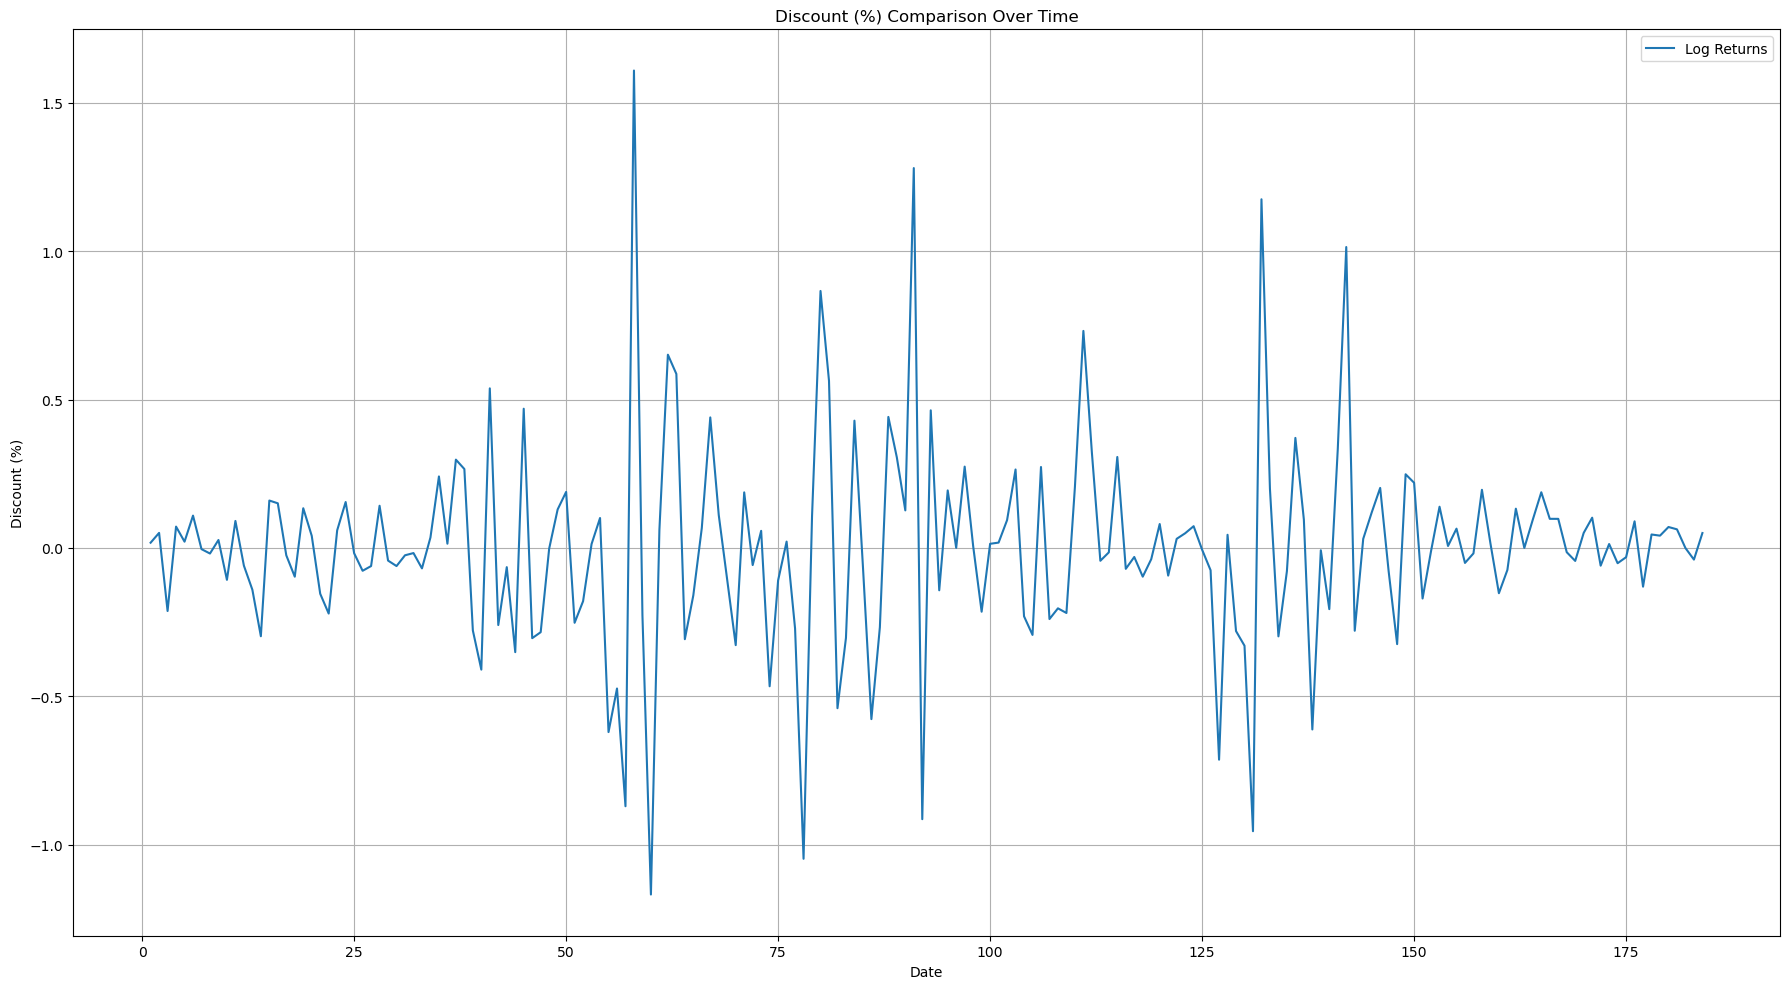

In [56]:
plt.figure(figsize=(18, 10))
plt.plot(CEFD['d_CEFD'], label='Log Returns')
plt.xlabel('Date')
plt.ylabel('Discount (%)')
plt.title('Discount (%) Comparison Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

Shares Weight Approach

In [44]:
virtus_ai_shares = 34_349_815
stk_shares = 16_556_431
nasdaq_shares = 48_826_783
bst_shares = 34_720_019
bstz_shares = 74_168_909

total_shares = virtus_ai_shares + stk_shares + nasdaq_shares + bst_shares + bstz_shares

w_virtus_ai_shares = virtus_ai_shares/total_shares
w_stk_shares = stk_shares/total_shares
w_nasdaq_shares = nasdaq_shares/total_shares
w_bst_shares = bst_shares/total_shares
w_bstz_shares = bstz_shares/total_shares

In [45]:
cefd_weighted_shares = pd.DataFrame(data = (
    w_virtus_ai_shares * virtus_ai['Discount (%)'] +
    w_stk_shares * stk['Discount (%)'] +
    w_nasdaq_shares * nasdaq['Discount (%)'] +
    w_bst_shares * bst['Discount (%)'] +
    w_bstz_shares * bstz['Discount (%)'])
)
cefd_weighted_shares['Date'] = pd.to_datetime(virtus_ai['Date'])

In [46]:
cefd_weighted.to_csv('CEFD_MAIN')

In [47]:
CEFD = pd.read_csv('CEFD_MAIN')
CEFD['Discounts'] = CEFD['Discount (%)'] # * 100 * -1
scaler = MinMaxScaler()
CEFD['Normalized Discount'] = scaler.fit_transform(CEFD[['Discounts']])

num = []
for i in range(len(CEFD['Normalized Discount'])):
    if CEFD['Normalized Discount'][i] == 0:
        num.append(i)
if num != []:
    CEFD['Normalized Discount'][num[0]] = (CEFD['Normalized Discount'][num[0]-1] + 
                                       CEFD['Normalized Discount'][num[0]+1]) / 2

CEFD['d_CEFD'] = np.log(CEFD['Normalized Discount'] / CEFD['Normalized Discount'].shift(1))

C:\Users\tural\AppData\Local\Temp\ipykernel_14080\1752531533.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CEFD['Normalized Discount'][num[0]] = (CEFD['Normalized Discount'][num[0]-1] +


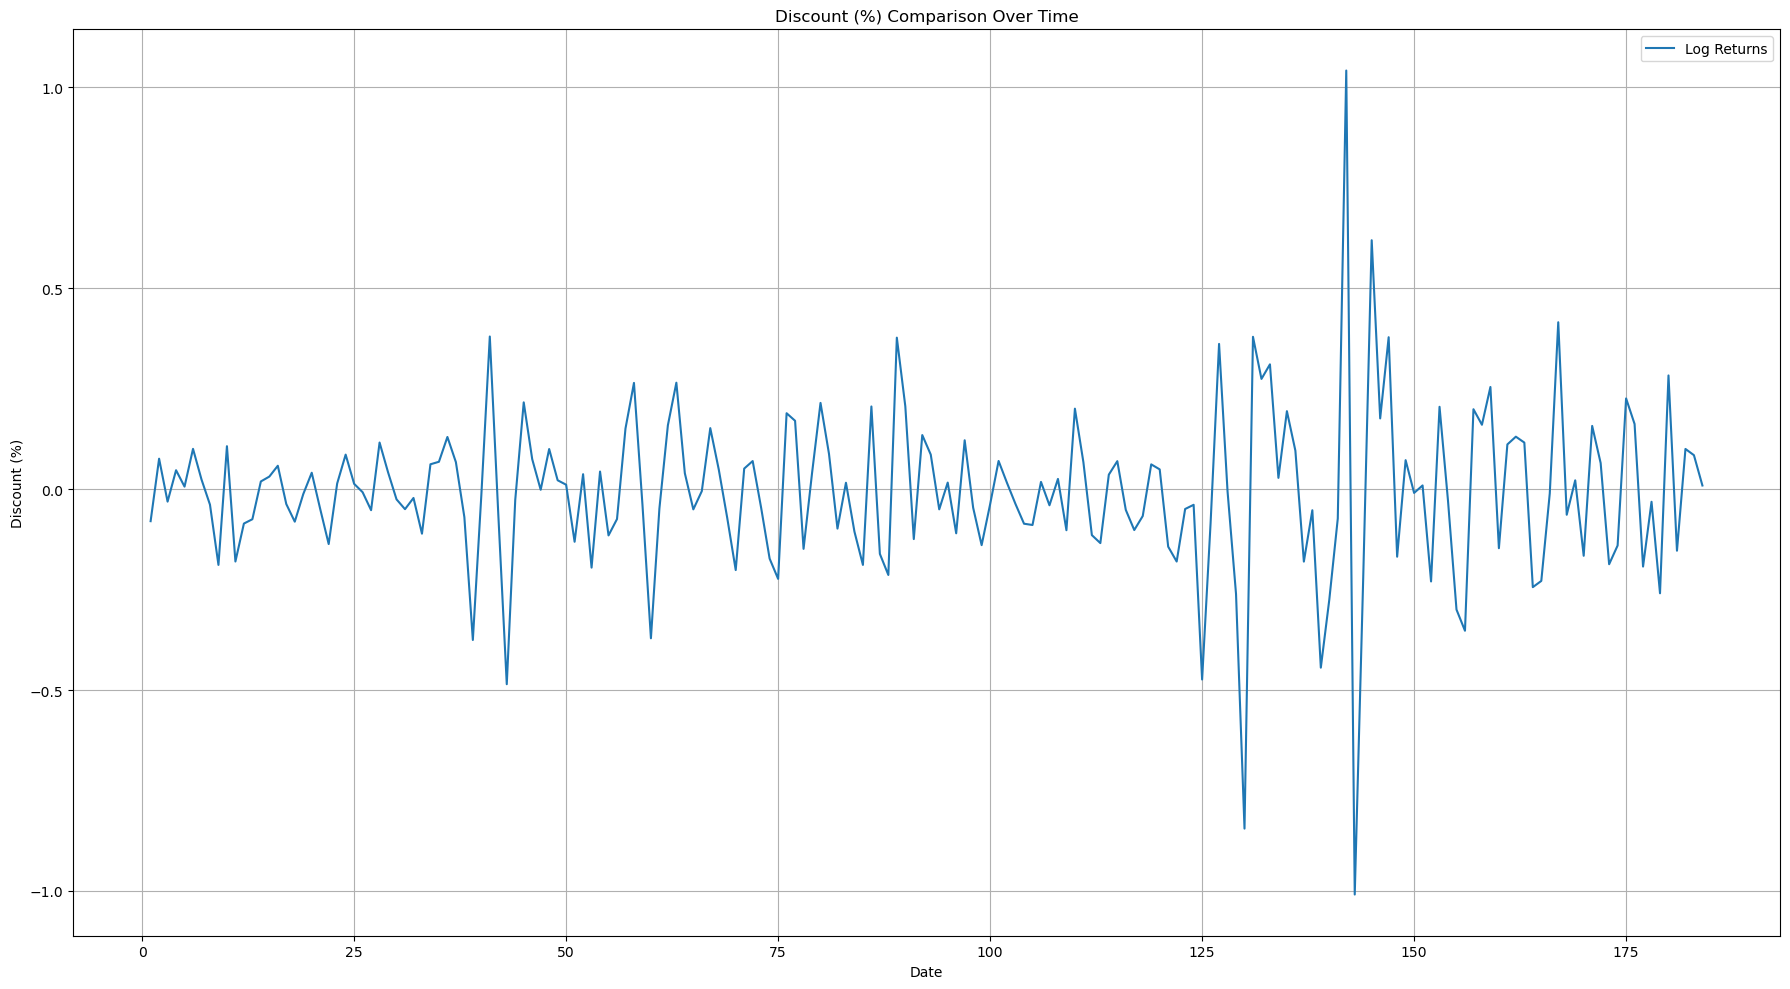

In [48]:
plt.figure(figsize=(18, 10))
plt.plot(CEFD['d_CEFD'], label='Log Returns')
plt.xlabel('Date')
plt.ylabel('Discount (%)')
plt.title('Discount (%) Comparison Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()